### Import your dependencies

In [1]:
from twitter import *
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import advertools as adv
import sys, os
from collections import Counter
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
import itertools
from config import access_token, access_token_secret, api_key, api_secret

### OAuth dance

In [2]:
t = Twitter(
    auth=OAuth(access_token, access_token_secret, api_key, api_secret))
print(t)

### "where on earth identifier" or WOEID

In [3]:
# See https://dev.twitter.com/docs/api/1.1/get/trends/place
#which is a legacy identifier created by Yahoo and has been deprecated. Twitter API v1.1 still uses the numeric value to identify town and country trend locations.

WORLD_WOE_ID = 1
MX_WOE_ID = 23424900

world_trends = t.trends.place(_id=WORLD_WOE_ID)
mx_trends = t.trends.place(_id=MX_WOE_ID)

### Convert our World Trending Topics into JSON format

In [4]:
#JSON conversion
import json
world_json_trends=json.dumps(world_trends, indent=1)
print(world_json_trends)

[
 {
  "trends": [
   {
    "name": "Flores",
    "url": "http://twitter.com/search?q=Flores",
    "promoted_content": null,
    "query": "Flores",
    "tweet_volume": 137792
   },
   {
    "name": "#CONFERENZASTAMPA",
    "url": "http://twitter.com/search?q=%23CONFERENZASTAMPA",
    "promoted_content": null,
    "query": "%23CONFERENZASTAMPA",
    "tweet_volume": 18185
   },
   {
    "name": "#FBvADS",
    "url": "http://twitter.com/search?q=%23FBvADS",
    "promoted_content": null,
    "query": "%23FBvADS",
    "tweet_volume": 10063
   },
   {
    "name": "#AliKoc\u0130stifa",
    "url": "http://twitter.com/search?q=%23AliKoc%C4%B0stifa",
    "promoted_content": null,
    "query": "%23AliKoc%C4%B0stifa",
    "tweet_volume": null
   },
   {
    "name": "#TeamGhana",
    "url": "http://twitter.com/search?q=%23TeamGhana",
    "promoted_content": null,
    "query": "%23TeamGhana",
    "tweet_volume": 49765
   },
   {
    "name": "#THESECONDSTEP_CHAPTERONE",
    "url": "http://twitter.com

### List comprenhension to iterate over the JSON

In [5]:
#itearate over the json to get the trend list and the tweet volume
world_trends_list = [trend['name'] 
                        for trend in world_trends[0]['trends']]

world_trending_volume =[trend['tweet_volume'] 
                        for trend in world_trends[0]['trends']]

print(world_trends_list, world_trending_volume)

['Flores', '#CONFERENZASTAMPA', '#FBvADS', '#AliKocİstifa', '#TeamGhana', '#THESECONDSTEP_CHAPTERONE', 'Ana Clara', 'Dolphins', 'Rafa Kalimann', 'Morocco', 'Belhanda', 'Acuña', 'Mert Hakan', 'Joe Judge', 'Fresh Prince', 'Gökhan İnler', 'Berke', 'Etec', 'Grier', 'İrfan', 'Stephen Ross', 'Boufal', "Norveç'ten", 'Pelkas', 'Christopher Acosta', 'Fenerbahçe', 'Ayew', 'Clay Aiken', 'Boninho', 'Lucas Ribeiro', 'Giants', 'Camilla', 'Maroc', 'WE WANT BLACKPINK COMEBACK', 'Harbaugh', 'Plutão', '打順と守備位置', 'Umtiti', 'Jim Jordan', 'Partey', 'Black Stars', 'Valencia', 'Ken Dsuper1or', 'John Mara', 'Visual King Jungkook', 'Watson', 'Zynga', '#TOTY', '#1stMINIALBUM', '#OurBelovedSummerEp11'] [137792, 18185, 10063, None, 49765, 650033, 12324, 90854, 11117, 34025, None, 33611, None, 40527, 10902, None, None, 13754, 11712, None, None, None, None, None, 13292, 73270, 12904, None, 22566, None, 129835, 10832, 19975, None, 22518, None, None, 38641, 133296, None, 12986, 40514, 14377, None, 56306, 26944, None,

### Create a dictionary

In [6]:
#The following step is to create a dictionary, so we can create a DataFrame.
world_data ={"Trend_name":world_trends_list,"Tweet_volume":world_trending_volume}
#print(data)

### Create a DataFrame out of the previous dictionary

In [7]:
# In this DataFrame we can review the Trending topics in a more digesteble way.
world_df =pd.DataFrame(world_data)
world_df.head(6)

Trend_name  Tweet_volume
0                     Flores      137792.0
1          #CONFERENZASTAMPA       18185.0
2                    #FBvADS       10063.0
3              #AliKocİstifa           NaN
4                 #TeamGhana       49765.0
5  #THESECONDSTEP_CHAPTERONE      650033.0

### Convert our MX Trending Topics into JSON format

In [8]:
#JSON conversion
mx_json_trends=json.dumps(mx_trends, indent=1)
#print(world_json_trends)

[
 {
  "trends": [
   {
    "name": "Flores",
    "url": "http://twitter.com/search?q=Flores",
    "promoted_content": null,
    "query": "Flores",
    "tweet_volume": 137792
   },
   {
    "name": "#CONFERENZASTAMPA",
    "url": "http://twitter.com/search?q=%23CONFERENZASTAMPA",
    "promoted_content": null,
    "query": "%23CONFERENZASTAMPA",
    "tweet_volume": 18185
   },
   {
    "name": "#FBvADS",
    "url": "http://twitter.com/search?q=%23FBvADS",
    "promoted_content": null,
    "query": "%23FBvADS",
    "tweet_volume": 10063
   },
   {
    "name": "#AliKoc\u0130stifa",
    "url": "http://twitter.com/search?q=%23AliKoc%C4%B0stifa",
    "promoted_content": null,
    "query": "%23AliKoc%C4%B0stifa",
    "tweet_volume": null
   },
   {
    "name": "#TeamGhana",
    "url": "http://twitter.com/search?q=%23TeamGhana",
    "promoted_content": null,
    "query": "%23TeamGhana",
    "tweet_volume": 49765
   },
   {
    "name": "#THESECONDSTEP_CHAPTERONE",
    "url": "http://twitter.com

### List comprenhension to iterate over the JSON

In [9]:
#itearate over the json to get the trend list and the tweet volume
mx_trends_list = [trend['name'] 
                        for trend in mx_trends[0]['trends']]

mx_trending_volume =[trend['tweet_volume'] 
                        for trend in mx_trends[0]['trends']]

#print(mx_trends_list, mx_trending_volume)

['#FelizLunes', '#Disciplina', '#NuevoLeonEsProVida', 'Nicaragua', '#KOREAQUEST_JISOO', '#oigopoderoso', 'Irresponsable', 'Kings of Convenience', 'Daniel Ortega', 'SEOUL', 'Brian Flores', 'Umtiti', 'Anaya', 'Centroamérica', 'El Presidente', 'Monreal', 'Radical', 'Gabriela Mistral', 'Locatel', 'Hitman', 'Día 10', 'Ebrard', 'Pascal', 'Novak Djokovic', 'Lunes 10', 'Abierto de Australia', 'Rápido y Furioso', 'El Chapo', 'Barinas', 'Aeroméxico', '#FelizInicioDeSemana', '#ElCovidVaPorLosNiños', '#REC2022', '#DiaMundialDeBelinda', '#IlanaYMike', '#BuenLunes', '#3YearsWithYeonjun', '#LunesDeMotivacion', '#THESECONDSTEP_CHAPTERONE', '#TOTY', '#YLasMedicinas', '#1stMINIALBUM', '#티일사일구', '#los9000demaquina', '#Mañanera', '#MondayMotivation', '#T1419', '#Columna', '#UDLAP', '#KornoConFrenoDeMano'] [18551, None, None, 53039, 13146, None, 22393, None, 33118, 118755, 50430, 38641, 12939, None, 158630, 19845, 44072, None, None, None, 50813, 19380, 12549, 205821, 26322, None, 27362, 17071, 355437, None

In [10]:
#The following step is to create a dictionary, so we can create a DataFrame.
mx_data ={"Trend_name":mx_trends_list,"Tweet_volume":mx_trending_volume}
#print(data)

In [11]:
# In this DataFrame we can review the Trending topics in a more digesteble way.
mx_df=pd.DataFrame(mx_data)
mx_df.head(5)

Trend_name  Tweet_volume
0          #FelizLunes       18551.0
1          #Disciplina           NaN
2  #NuevoLeonEsProVida           NaN
3            Nicaragua       53039.0
4    #KOREAQUEST_JISOO       13146.0

### Get the statutes/tweets

In [12]:
q = '#Bitcoin' 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets
search_results = t.search.tweets(q=q, count=count)

#print(search_results)

#access to statuses
statuses = search_results['statuses']

#print(search_results)

{'statuses': [{'created_at': 'Mon Jan 10 18:35:51 +0000 2022', 'id': 1480609349164838916, 'id_str': '1480609349164838916', 'text': 'RT @NebraskanCrypto: This #Bitcoin ~~ $NASDAQ fractal is terrifying. 😱 https://t.co/yfTtaTvRXs', 'truncated': False, 'entities': {'hashtags': [{'text': 'Bitcoin', 'indices': [26, 34]}], 'symbols': [{'text': 'NASDAQ', 'indices': [38, 45]}], 'user_mentions': [{'screen_name': 'NebraskanCrypto', 'name': 'Nebraskan Crypto \uea00', 'id': 3696215239, 'id_str': '3696215239', 'indices': [3, 19]}], 'urls': [], 'media': [{'id': 1480604828627877889, 'id_str': '1480604828627877889', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/FIwqPz8XwAE-8IM.png', 'media_url_https': 'https://pbs.twimg.com/media/FIwqPz8XwAE-8IM.png', 'url': 'https://t.co/yfTtaTvRXs', 'display_url': 'pic.twitter.com/yfTtaTvRXs', 'expanded_url': 'https://twitter.com/NebraskanCrypto/status/1480604925931528199/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 157, 'resize': 'fi

In [13]:
#print(search_results)

{'statuses': [{'created_at': 'Mon Jan 10 18:35:51 +0000 2022', 'id': 1480609349164838916, 'id_str': '1480609349164838916', 'text': 'RT @NebraskanCrypto: This #Bitcoin ~~ $NASDAQ fractal is terrifying. 😱 https://t.co/yfTtaTvRXs', 'truncated': False, 'entities': {'hashtags': [{'text': 'Bitcoin', 'indices': [26, 34]}], 'symbols': [{'text': 'NASDAQ', 'indices': [38, 45]}], 'user_mentions': [{'screen_name': 'NebraskanCrypto', 'name': 'Nebraskan Crypto \uea00', 'id': 3696215239, 'id_str': '3696215239', 'indices': [3, 19]}], 'urls': [], 'media': [{'id': 1480604828627877889, 'id_str': '1480604828627877889', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/FIwqPz8XwAE-8IM.png', 'media_url_https': 'https://pbs.twimg.com/media/FIwqPz8XwAE-8IM.png', 'url': 'https://t.co/yfTtaTvRXs', 'display_url': 'pic.twitter.com/yfTtaTvRXs', 'expanded_url': 'https://twitter.com/NebraskanCrypto/status/1480604925931528199/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 157, 'resize': 'fi

### Get the latest tweets

In [14]:
# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break### Get the statutes/tweets
    
    #print(next_results) #para ver el último nextresult
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23Bitcoin&count=100&include_entities=1
    # you are creating a dictionary and by kv.split(=) you are creating key-value pairs
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    print(kwargs)
    
    search_results = t.search.tweets(**kwargs)
    statuses += search_results['statuses']
    #print(statuses)

Length of statuses 82
{'max_id': '1480609201240084483', 'q': '#Bitcoin', 'count': '100', 'include_entities': '1'}
[{'created_at': 'Mon Jan 10 18:35:51 +0000 2022', 'id': 1480609349164838916, 'id_str': '1480609349164838916', 'text': 'RT @NebraskanCrypto: This #Bitcoin ~~ $NASDAQ fractal is terrifying. 😱 https://t.co/yfTtaTvRXs', 'truncated': False, 'entities': {'hashtags': [{'text': 'Bitcoin', 'indices': [26, 34]}], 'symbols': [{'text': 'NASDAQ', 'indices': [38, 45]}], 'user_mentions': [{'screen_name': 'NebraskanCrypto', 'name': 'Nebraskan Crypto \uea00', 'id': 3696215239, 'id_str': '3696215239', 'indices': [3, 19]}], 'urls': [], 'media': [{'id': 1480604828627877889, 'id_str': '1480604828627877889', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/FIwqPz8XwAE-8IM.png', 'media_url_https': 'https://pbs.twimg.com/media/FIwqPz8XwAE-8IM.png', 'url': 'https://t.co/yfTtaTvRXs', 'display_url': 'pic.twitter.com/yfTtaTvRXs', 'expanded_url': 'https://twitter.com/NebraskanCrypto/status

[{'created_at': 'Mon Jan 10 18:35:51 +0000 2022', 'id': 1480609349164838916, 'id_str': '1480609349164838916', 'text': 'RT @NebraskanCrypto: This #Bitcoin ~~ $NASDAQ fractal is terrifying. 😱 https://t.co/yfTtaTvRXs', 'truncated': False, 'entities': {'hashtags': [{'text': 'Bitcoin', 'indices': [26, 34]}], 'symbols': [{'text': 'NASDAQ', 'indices': [38, 45]}], 'user_mentions': [{'screen_name': 'NebraskanCrypto', 'name': 'Nebraskan Crypto \uea00', 'id': 3696215239, 'id_str': '3696215239', 'indices': [3, 19]}], 'urls': [], 'media': [{'id': 1480604828627877889, 'id_str': '1480604828627877889', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/FIwqPz8XwAE-8IM.png', 'media_url_https': 'https://pbs.twimg.com/media/FIwqPz8XwAE-8IM.png', 'url': 'https://t.co/yfTtaTvRXs', 'display_url': 'pic.twitter.com/yfTtaTvRXs', 'expanded_url': 'https://twitter.com/NebraskanCrypto/status/1480604925931528199/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 680, 'h': 157, 'resize': 'fit'}, 'medium'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Get all the status text, screen names, hastags and words

In [15]:
#get the statuses
status_text = [status['text'] 
                 for status in statuses]
#get the screen names
screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]
#get the hastags
hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_text 
              for w in t.split() ]

### Create a list that contains the word and its count up to the first ten elements

In [16]:
#from collections import Counter
for item in [status_text, screen_names, hashtags, words]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT @AltcoinDailyio: This dip is a blessing for those who believe in #bitcoin’s long term value.', 11), ('RT @kriptozeryan: #Bitcoin\xa0 \n\nBu kötü günlerde herkese destek olmak için!\n \n🎉🎁🎈ÇEKİLİŞ VAR 🎉🎁🎈\n💵 SINIRSIZ KİŞİYE SABIR!\n👉🏻Bu gönderiyi  RT🔄…', 7), ("RT @Eljaboom: If you can't keep #bitcoin while it's down 80%, you don't deserve it when it's up 10000%", 7), ('RT @kripto_cem: #Ethereum 2850$ güçlü destek.. \n\nBurada eğer sağlam kalırsa yeni alımlar için bizi heyecanlandırabilir. #Bitcoin tarafında…', 6), ('RT @BitcoinMagazine: Legendary investor Bill Miller: I am a #bitcoin bull 🚀 https://t.co/1RCJ10osDU', 6), ('RT @Cryptoahbap: Evet #bitcoin sayesinde milyoner olan genç bir arkadaşınız olarak 3 bin takipçi sayısını geçtim ve söz verdiğim gibi çekil…', 5), ("RT @cryptolegennd: Çekiliş Zamanı 🥳🥳\n\n1 Kişiye 5000 TL 🤑🤑\n\nŞartlar : Rt + Fav + Hesabı Takip\n\nSonuçlar: 20.01.2022'de açıklanacaktır \n\n#bit…", 5), ('RT @kripto_cem: Bu bezdirme değil de ne ?\n\nSöyler misin? 

### Clean *stop words* from words

In [17]:
#import nltk
#from nltk.corpus import stopwords  
#from nltk.tokenize import word_tokenize

stopwords = (["have", "has", "this", "are", "as", "-", "|", "A", "is", "me", "you", 'I', 'will', "on",":","to","+","be","1", "of", "in", "the", "for", "The", "at", "and", "La", "En", "http…", "??..", "https://t.co/", "Y", "y", "nos", "esta", "está", "o", "sus", "este", "por", "Se", "RT", "RT ", "a", "con", "El", "un", "https", "la", "en", "que" , "el" ,"se" ,"del", "de", "le", "al", "co", "lo", "y", "t", "si", "ni", "su", "tu", "Ni", "como", "para", "los", "les","e"])

filterwords= [w for w in words if not w in stopwords]

In [18]:
for item in [screen_names, hashtags, filterwords]:
    c=Counter(item)
    print(c.most_common()[:10])
    print()

[('shibPython', 76), ('BitcoinMagazine', 19), ('AltcoinDailyio', 16), ('DocumentingBTC', 13), ('kripto_cem', 12), ('Kriptozenciii', 12), ('BTC_Archive', 11), ('CryptoMichNL', 8), ('JobPreference', 8), ('Eljaboom', 8)]

[('Bitcoin', 263), ('Ethereum', 102), ('bitcoin', 101), ('RBXS', 83), ('BSC', 77), ('shiba', 73), ('Airdrop', 65), ('dogecoin', 47), ('crypto', 17), ('altcoin', 14)]

[('#Bitcoin', 240), ('#Ethereum', 94), ('#bitcoin', 88), ('#RBXS', 83), ('⚡Social', 78), ('media:', 77), ('@shibPython:', 76), ('#BSC', 75), ('https://t.co/5h8EAulmTx', 73), ('#shiba', 71)]



In [19]:
for item in [filterwords]:
    c = Counter(item)
    clean_filterwords=pd.DataFrame(c.most_common()[:10])
    clean_filterwords.columns=["Words","Count"]
clean_filterwords

Words  Count
0                 #Bitcoin    240
1                #Ethereum     94
2                 #bitcoin     88
3                    #RBXS     83
4                  ⚡Social     78
5                   media:     77
6             @shibPython:     76
7                     #BSC     75
8  https://t.co/5h8EAulmTx     73
9                   #shiba     71

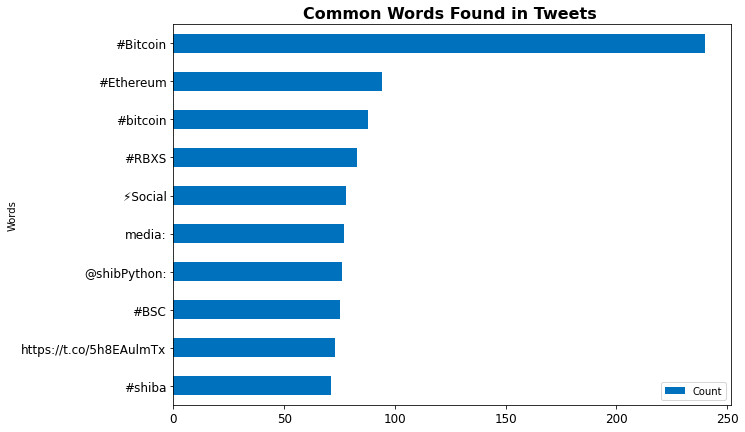

In [20]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
clean_filterwords.sort_values(by='Count').plot.barh(x='Words',
                      y='Count',
                      ax=ax,
                      color="#0072BD")

ax.set_title("Common Words Found in Tweets ", fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [21]:
for item in [screen_names]:
    c = Counter(item)
    clean_screennames=pd.DataFrame(c.most_common()[:10])
    clean_screennames.columns=["Screen Names","Count"]
clean_screennames

Screen Names  Count
0       shibPython     76
1  BitcoinMagazine     19
2   AltcoinDailyio     16
3   DocumentingBTC     13
4       kripto_cem     12
5    Kriptozenciii     12
6      BTC_Archive     11
7     CryptoMichNL      8
8    JobPreference      8
9         Eljaboom      8

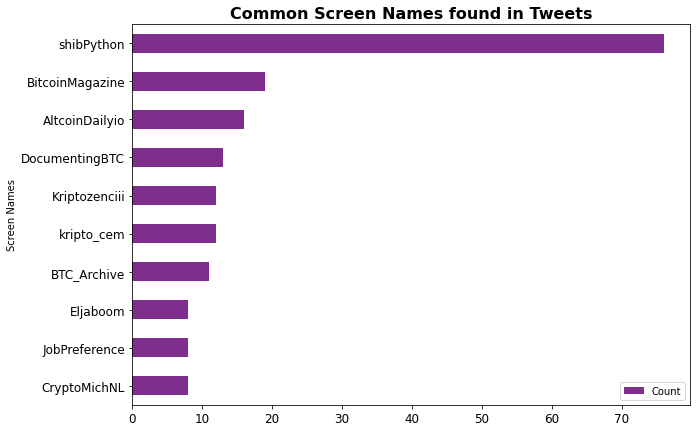

In [22]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
clean_screennames.sort_values(by='Count').plot.barh(x='Screen Names',
                      y='Count',
                      ax=ax,
                      color="#7E2F8E")

ax.set_title("Common Screen Names found in Tweets", fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

In [23]:
for item in [hashtags]:
    c = Counter(item)
    clean_hastags=pd.DataFrame(c.most_common()[:10])
    clean_hastags.columns=["Hashtags","Count"]
clean_hastags

Hashtags  Count
0   Bitcoin    263
1  Ethereum    102
2   bitcoin    101
3      RBXS     83
4       BSC     77
5     shiba     73
6   Airdrop     65
7  dogecoin     47
8    crypto     17
9   altcoin     14

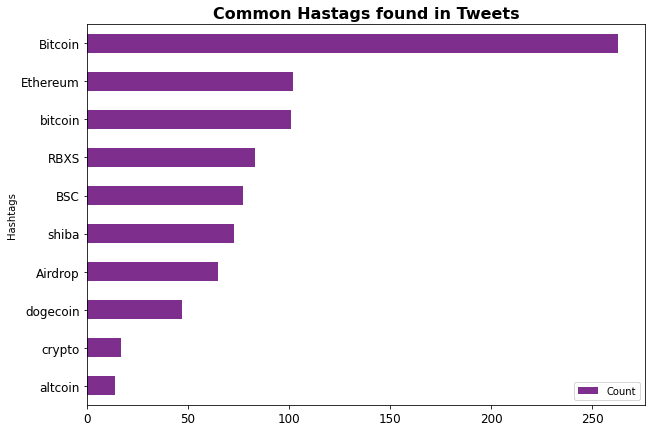

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot horizontal bar graph
clean_hastags.sort_values(by='Count').plot.barh(x='Hashtags',
                      y='Count',
                      ax=ax,
                      color="#7E2F8E")

ax.set_title("Common Hastags found in Tweets", fontsize=16, fontweight='bold')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

### Create a dataframe that shows the most retweeted statuses

In [25]:
#import itertools

retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['retweeted_status']['created_at'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

retweets.sort(reverse=True)
pd3=pd.DataFrame(list(retweets for retweets,_ in itertools.groupby(retweets)))
pd3.columns=["Retweet Count", "Screen Name", "Tweet ID", "Created At", "Text"]
pd3.head(6)

Retweet Count    Screen Name             Tweet ID  \
0          18759  AirdropStario  1478293053354000386   
1          16040    IbaxNetwork  1456463184110497833   
2           6136    CryptoWhale  1479484964878135298   
3           5058    Cryptoahbap  1480246052024430595   
4           4771  AirdropStario  1449533596302258181   
5           4445     Rugal_Bull  1479478815390900234   

                       Created At  \
0  Tue Jan 04 09:11:43 +0000 2022   
1  Fri Nov 05 03:27:37 +0000 2021   
2  Fri Jan 07 16:07:57 +0000 2022   
3  Sun Jan 09 18:32:15 +0000 2022   
4  Sun Oct 17 00:31:55 +0000 2021   
5  Fri Jan 07 15:43:31 +0000 2022   

                                                Text  
0  RT @AirdropStario: 💧 Ancient KingDom Airdrop 💧...  
1  RT @IbaxNetwork: #IBAX #Airdrop is coming next...  
2  RT @CryptoWhale: Bloomberg now says #Bitcoin i...  
3  RT @Cryptoahbap: Evet #bitcoin sayesinde milyo...  
4  RT @AirdropStario: 💧 Soft Cash Airdrop 💧\n\n🏆 ...  
5  RT @Rugal_Bull: 1 person who retweets and foll...

In [26]:
emoji_summary = adv.extract_emoji(pd3['Text'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [27]:
emoji_summary["overview"]["num_emoji"]

202

In [28]:
emoji_list=emoji_summary["top_emoji"][:11]
emoji_list

[('⚡', 63),
 ('🚀', 11),
 ('🔥', 9),
 ('💧', 8),
 ('➕', 7),
 ('🎉', 6),
 ('🏆', 4),
 ('🤑', 4),
 ('🎁', 4),
 ('👇', 4),
 ('🔺', 4)]

In [29]:
emoji_df=pd.DataFrame(emoji_list)
emoji_df.rename(columns={0:'Emoji',1:'Count'},inplace=True)
emoji_df

Emoji  Count
0      ⚡     63
1      🚀     11
2      🔥      9
3      💧      8
4      ➕      7
5      🎉      6
6      🏆      4
7      🤑      4
8      🎁      4
9      👇      4
10     🔺      4

There are 36414 words in the combination of all review.


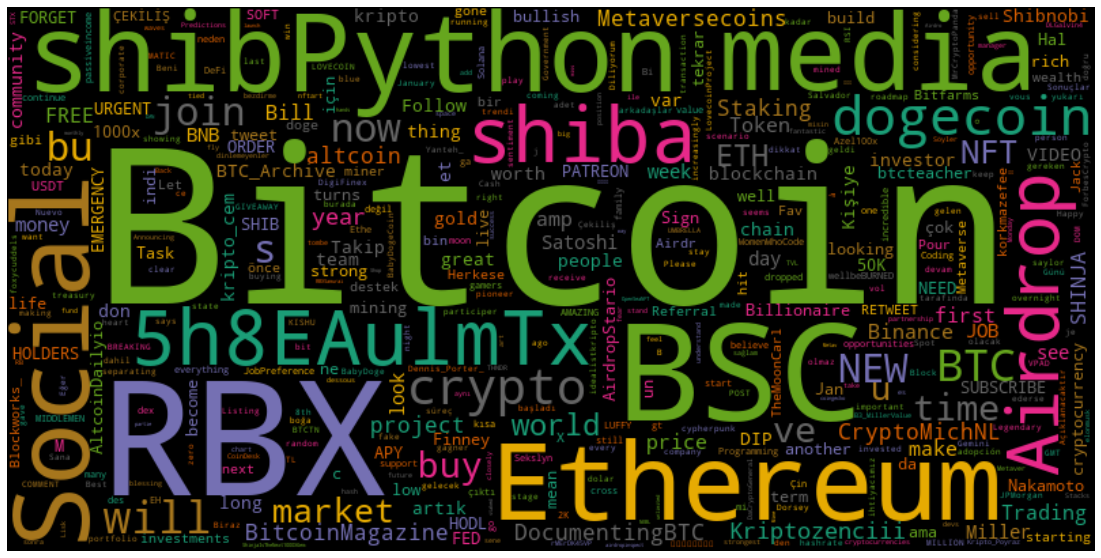

In [30]:
import os
from PIL import Image
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)


# Read the whole text.
text = " ".join(review for review in pd3.Text)

stopwords = set(STOPWORDS)

stopwords.update(["RT", "e", "RT ", "https", "la", "en", "que" , "el" ,"se" ,"del", "de", "le", "al", "co", "lo", "y", "t", "si", "ni", "su", "tu", "Ni", "como", "para", "los", "les","e"])

print ("There are {} words in the combination of all review.".format(len(text)))


# Generate a word cloud image

wordcloud = WordCloud(colormap="Dark2", background_color="black", stopwords=stopwords, max_words=2000, collocations=False, width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# The pil way (if you don't have matplotlib)
# image = wordcloud.to_image()
import string# image.show()

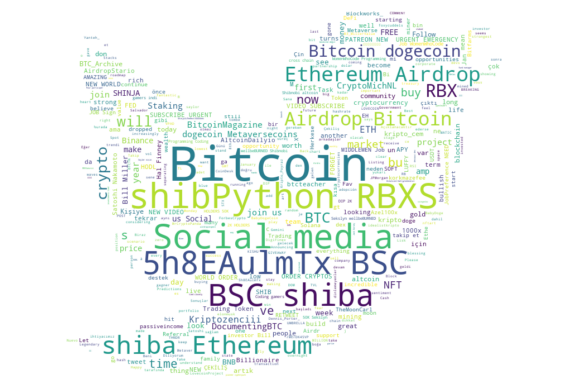

In [31]:
# Para este código, la imagen debe de tener un fondo blanco

# Create a word cloud image

twitter_mask = np.array(Image.open("resources/twitter.jpg"))

wc = WordCloud(background_color="white", max_words=4000, mask=twitter_mask,
               stopwords=stopwords, contour_width=2, contour_color='white')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("resources/twitter1.png")

# show
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

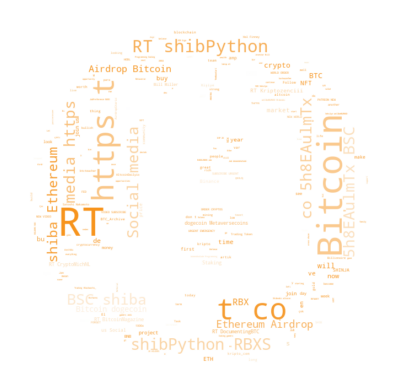

In [32]:
# Read the whole text.
text =  " ".join(review for review in pd3.Text)

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
mask = np.array(Image.open("resources/bitcoin.jpg"))

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=10000, mask=mask,contour_width=0, contour_color='orange',
               stopwords=stopwords)

# generate word cloud
wc.generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

In [33]:
def sum(*args):
    value = 0
    for n in args:
        value = value+n
    return value

In [34]:
sum(2,5)

7